# Day 15

In [1]:
from enum import Enum
from itertools import chain

Direction = Enum('Direction', 'U R D L')

class Point:
    def __init__(self, y, x, risk_factor):
        self.y = y
        self.x = x
        self.risk_factor = risk_factor
        self.direction = None
        self.neighbours_risk_factor = 0
    def __repr__(self):
        if self.direction:
            return f'{self.direction.name}{self.neighbours_risk_factor}'
        else:
            return str(self.risk_factor)
    def total_risk_factor(self):
        return self.risk_factor + self.neighbours_risk_factor
    
def get_val(y, x, arr):
    try:
        if (x < 0) or (y < 0):
            return None
        return arr[y][x]
    except Exception:
        return None
    
def fill_point(point, points):    
    dn = get_val(point.y+1, point.x, points)
    rn = get_val(point.y, point.x+1, points)
    if dn:
        if rn and (rn.total_risk_factor() < dn.total_risk_factor()):
            point.direction = Direction.R
            point.neighbours_risk_factor = rn.total_risk_factor()
        else:
            point.direction = Direction.D
            point.neighbours_risk_factor = dn.total_risk_factor()
    elif rn:
        point.direction = Direction.R        
        point.neighbours_risk_factor = rn.total_risk_factor()        
        
def fill_points(points):
    for line in points[::-1]:
        for point in line[::-1]:
            fill_point(point, points)
            
def find_direction_to_p1(p0, p1, default=None):
    if p0.x < p1.x:
        return Direction.R
    elif p0.x > p1.x:
        return Direction.L
    elif p0.y < p1.y:
        return Direction.D
    elif p0.y > p1.y:
        return Direction.U
    else:
        return default
            
def correct_point(point, points):
    pts = chain(
        (get_val(point.y, i, points) for i in (point.x - 1, point.x + 1)),
        (get_val(i, point.x, points) for i in (point.y - 1, point.y + 1)),
        (point,)
    )
    pts = (p for p in pts if p)    
    p = sorted(pts, key=lambda p: p.total_risk_factor())[0]
    if p is not point:
        point.neighbours_risk_factor = p.total_risk_factor()
        point.direction = find_direction_to_p1(point, p)
    
def correct_points(points):
    for row in points[::-1]:
        for point in row[::-1]:
            correct_point(point, points)
            
def correct_points_continuously(points):
    total_risk_factor = points[0][0].neighbours_risk_factor
    while True:    
        correct_points(points)
        new_risk_factor = points[0][0].neighbours_risk_factor
        if new_risk_factor == total_risk_factor:
            break
        else:
            total_risk_factor = new_risk_factor
    return total_risk_factor

with open('day15.txt', 'r') as f:
    lines = (line.strip() for line in f)
    points = [
        [Point(i, j, int(n)) for j, n in enumerate(line)]
        for i, line in enumerate(lines)
    ]      

fill_points(points)
correct_points_continuously(points)

366

In [2]:
def make_point(y, x, points, m, n):
    point = points[y % m][x % n]
    risk_factor = point.risk_factor + (y // m) + (x // n)
    if risk_factor >= 10:
        risk_factor -= 9
    return Point(y, x, risk_factor)
m, n = len(points), len(points[0])
new_points = [
    [make_point(y, x, points, m, n) for x in range(5*n)]
    for y in range(5*m)
]
fill_points(new_points)
correct_points_continuously(new_points)

2829

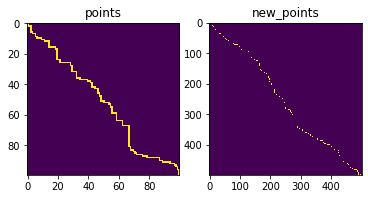

In [14]:
import matplotlib.pyplot as plt

def walk_path(points):
    y, x = 0, 0
    while True:
        point = points[y][x]
        yield point
        if point.direction == Direction.U:
            y -= 1
        elif point.direction == Direction.D:
            y += 1
        elif point.direction == Direction.L:
            x -= 1
        elif point.direction == Direction.R:
            x += 1
        else:
            break
        
def make_canvas(points):
    m, n = len(points), len(points[0])
    return [
        [False] * n
        for _ in range(m)
    ]
    
def chart(path, canvas):
    for point in path:
        canvas[point.y][point.x] = True
        
def chart_points(points, title, axis):
    canvas = make_canvas(points)
    path = walk_path(points)
    chart(path, canvas)
    axis.set_title(title)
    axis.imshow(canvas)    
    
_, (a, b) = plt.subplots(1, 2)
chart_points(points, 'points', a)
chart_points(new_points, 'new_points', b)
plt.show()